### Tutorial of Reading Nifit dataset

Read and extract time series data from nii or nii.gz files

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib

In [10]:
fmri_file = '/home/yat-lok/workspace/S122817_output/fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz'
fmri_file = '/home/yat-lok/workspace/S122817_output/fMRI/rfMRI.ica/parcellation_TVBSchaeferTian420.nii.gz'
f_img = nib.load(fmri_file)
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

(128, 128, 30)
(1.875, 1.875, 4.0)
('mm', 'sec')


In case of fMRI files, the fourth dimension (almost) always represents the “time” dimension. So you can assume that a nifti image of an fMRI file has 4 dimensions, with the first three being the spatial dimensions (similar to the anatomical MRI file: $X \times Y \times Z$) and the last (fourth) being the time dimension ($T$).

So for the above file, you can assume that it has 50 timepoints and has a sampling rate of 0.7 seconds (i.e., a new volume was scanned every 0.7 seconds).

Moreover, you can infer that this file contains data from $128 \times 128 \times 30$ voxels with dimensions $1.875 \times 1.875 \times 4.0 $ (in millimeters). To be honest, in practice, you won’t deal a lot with the header (as you are generally aware of the dimensions/units of your data), so let’s look at the actual data!

In [11]:
f_img_data = f_img.get_fdata()
print(f_img_data.shape)

(128, 128, 30)


Shape of slice: (128, 128)


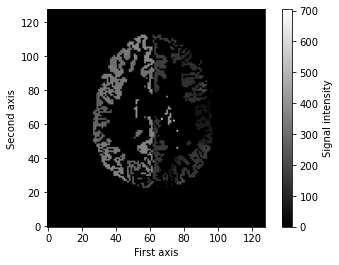

In [23]:
mid_slice_x_fmri = f_img_data[:, :, 20]  # x = 39, t = 0
print("Shape of slice: %s" % (mid_slice_x_fmri.shape,))

plt.imshow(mid_slice_x_fmri.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

 we can visualize a single slice (e.g., $x=39$) of the first volume ($t=0$)

In [20]:
mid_vox_ts = f_img_data[:, :, 15]  # note the ":", saying: give me ALL the timepoints
print("Voxel timeseries shape: %s" % (mid_vox_ts.shape,))


Voxel timeseries shape: (128, 128)


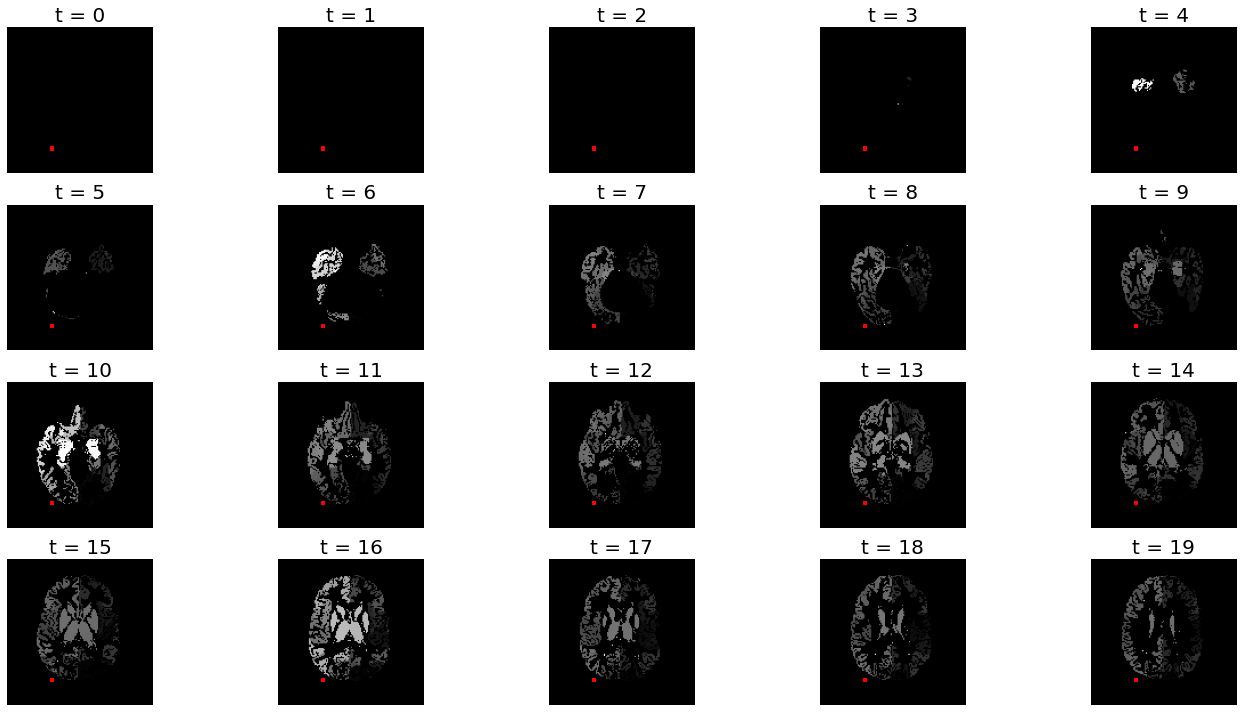

In [21]:
from matplotlib import patches

fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))  # 20 timepoints
# Loop over the first 20 volumes/timepoints
for t, ax in enumerate(axes.flatten()):    
    ax.imshow(f_img_data[:, :, t].T, cmap='gray', origin='lower')  # index with t!
    rect = patches.Rectangle((38, 20), 2, 2, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('off')
    ax.set_title('t = %i' % t, fontsize=20)
fig.tight_layout()

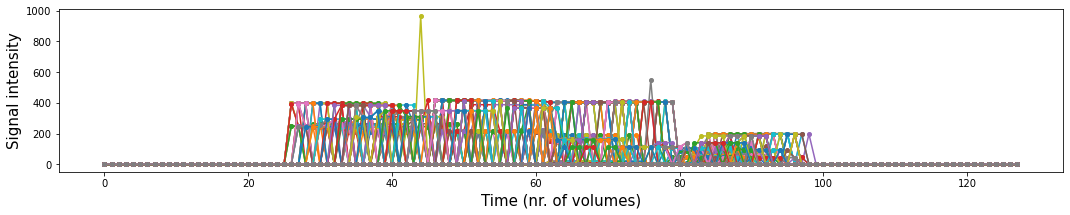

In [22]:
plt.figure(figsize=(18, 3))
plt.plot(mid_vox_ts, 'o-', ms=4)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.show()